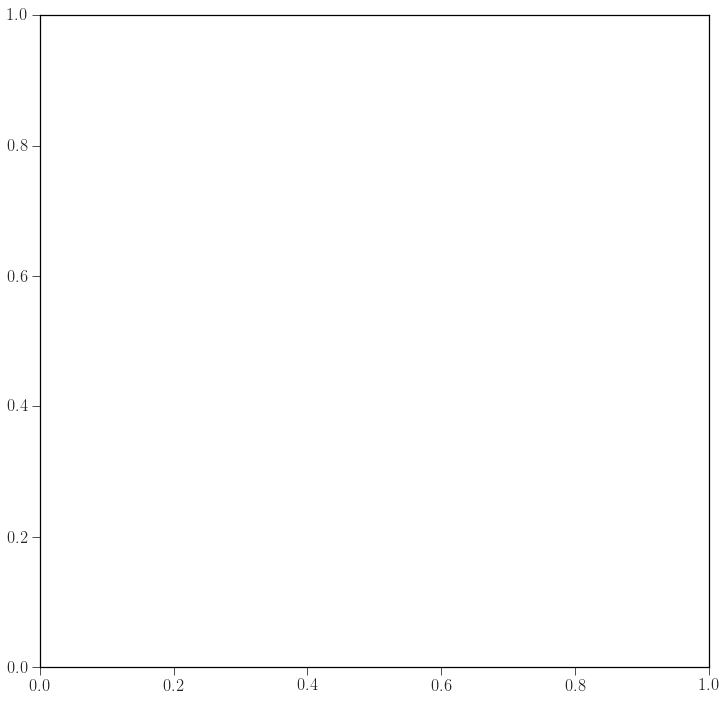

In [6]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import rc
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'

plt.tick_params(size = 8 ,labelsize = 'large')

plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 14}

rc('font', **font)

Let’s load a color image first:

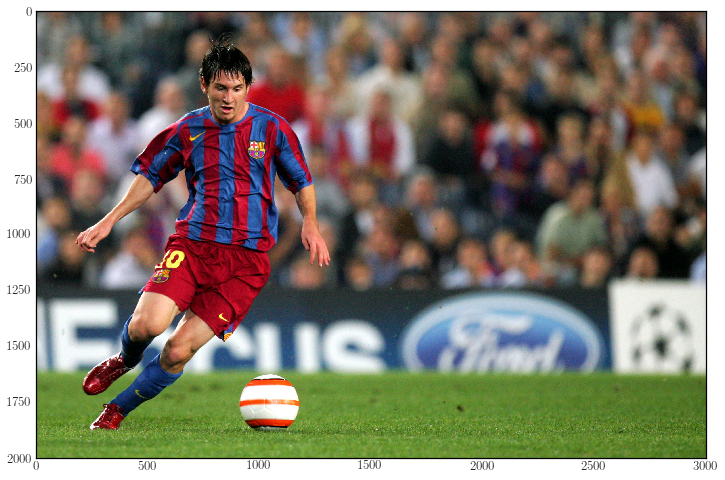

In [7]:
img = cv2.imread("messi5.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # bugfix to set a right color of image

plt.imshow(img)
plt.show()

You can access a pixel value by its row and column coordinates. 

For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [8]:
pxl = img[100, 100]

print (f"Pixel value : {pxl}")

# accesing only blue part of pixel

blues = img[100, 100, 0]

print (f"Blue part is equal to {blues}")

Pixel value : [142 139 130]
Blue part is equal to 142


You can modify the pixel values the same way:

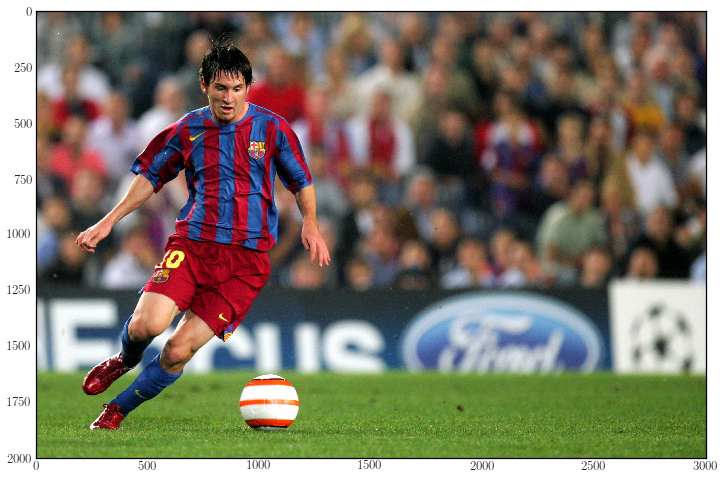

In [9]:
img[100, 100] = [255, 255, 255]

plt.imshow(img)
plt.show()

In order to avoid slowings in NumPy while accesing the elements using [] operator one need to use array.item() or array.itemset() instead. 
But it always returns a scalar. 
So if you want to access all B,G,R values, you need to call array.item() separately for all.

In [10]:
# accesing RED value
print (f"Red part of (10, 10) pixel is equal to {img.item(10, 10, 2)}")

# modifying RED value
img.itemset( (10, 10, 2), 100 )

print (f"Red part of (10, 10) pixel is modified to {img.item(10, 10, 2)}")

Red part of (10, 10) pixel is equal to 100
Red part of (10, 10) pixel is modified to 100


Shape of image is accessed by img.shape. 
It returns a tuple of number of rows, columns and channels (if image is color):



$\textbf{Note:}$ If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image. 

In [11]:
img.shape

(2000, 3000, 3)

In [12]:
# Total number of pixels is accessed by img.size:
print (f"Total number of pixels : {img.size}")
# Image datatype is obtained by img.dtype:
print (f"Image data type : {img.dtype}")

Total number of pixels : 18000000
Image data type : uint8


# Image ROI, operations with Image channels

Sometimes, you will have to play with certain region of images. For eye detection in images, first face detection is done all over the image and when face is obtained, we select the face region alone and search for eyes inside it instead of searching whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area)

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

[]

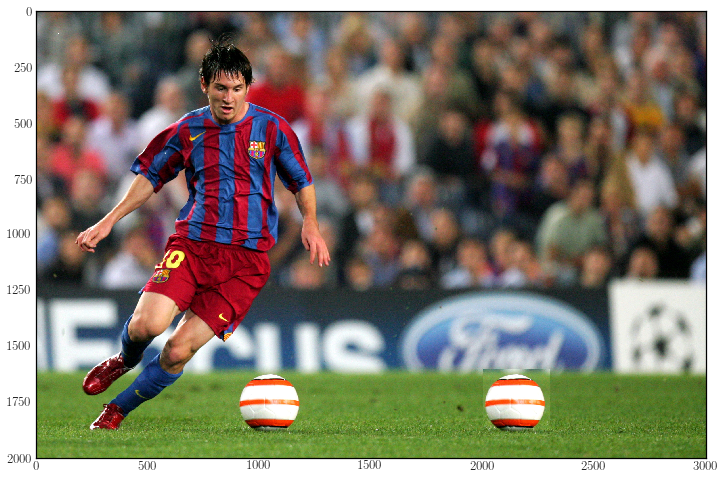

In [13]:
ball = img[1600 : 1900, 900 : 1200]
img[1600 : 1900, 2000 : 2300] = ball

plt.imshow(img)
plt.plot()

Sometimes you will need to work separately on B,G,R channels of image. 
Then you need to split the BGR images to single planes. 
Or another time, you may need to join these individual channels to BGR image. You can do it simply by:

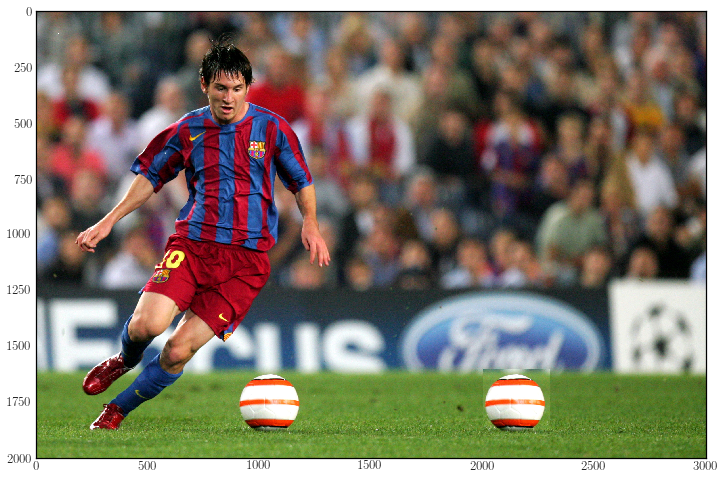

In [14]:
b_channel, g_channel, r_channel = cv2.split(img)
img = cv2.merge( (b_channel, g_channel, r_channel) )

plt.imshow(img)
plt.show()